In [1]:
#!pip install pandas numpy matplotlib seaborn scikit-learn plotly plotly_express scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
#!pip install seaborn

In [4]:
#!pip install statsmodels

In [5]:
#!pip install matplotlib


In [6]:
#!pip install plotly

#### Configuraciones

In [7]:
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 12

In [8]:
df = pd.read_csv('student_habits_performance.csv')

In [9]:
df.head(2)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


##### Buenas practicas

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [11]:
df['internet_quality'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [12]:
df.isnull().sum() / len(df) * 100

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         9.1
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

In [13]:
def valores_unicos(df):
    valores = df.select_dtypes(include='object') #selecciona solo las columnas de tipo object
    return valores

In [14]:
valores_unicos(df)

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
0,S1000,Female,No,Fair,Master,Average,Yes
1,S1001,Female,No,Good,High School,Average,No
2,S1002,Male,No,Poor,High School,Poor,No
3,S1003,Female,No,Poor,Master,Good,Yes
4,S1004,Female,No,Fair,Master,Good,No
...,...,...,...,...,...,...,...
995,S1995,Female,No,Fair,High School,Good,Yes
996,S1996,Female,Yes,Poor,High School,Average,Yes
997,S1997,Male,No,Good,Bachelor,Good,Yes
998,S1998,Male,Yes,Fair,Bachelor,Average,No


##### crear una funcion que selecciones las columnas que son objeto y nos devuelva los valores unicos que tiene cada uno de ellas 

In [15]:
def unique_values(df, cols):
    for col in cols:
        if df[col].dtype == 'object':  
            print(f"Unique values in {col}:")
            print(df[col].unique())
            print("\n")
 
 
# No usamos la primera columna porque es el id del estudiante y no tiene sentido ver los valores únicos de esa columna
unique_values(df, df.columns[1:])

Unique values in gender:
['Female' 'Male' 'Other']


Unique values in part_time_job:
['No' 'Yes']


Unique values in diet_quality:
['Fair' 'Good' 'Poor']


Unique values in parental_education_level:
['Master' 'High School' 'Bachelor' nan]


Unique values in internet_quality:
['Average' 'Poor' 'Good']


Unique values in extracurricular_participation:
['Yes' 'No']




In [16]:
df.shape

(1000, 16)

In [17]:
df.isnull().sum() / len(df) * 100

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         9.1
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

#### Cuál sería la mejor forma de arreglarlo. Cambiar valores Nan a sin atos en parental_education_level

In [18]:
df['parental_education_level'] = df['parental_education_level'].fillna('Sin datos')

#df['parental_education_level].fillna()'Sin datos', implace= True)


In [19]:
df.isnull().sum() / len(df) * 100

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         0.0
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.head(50)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


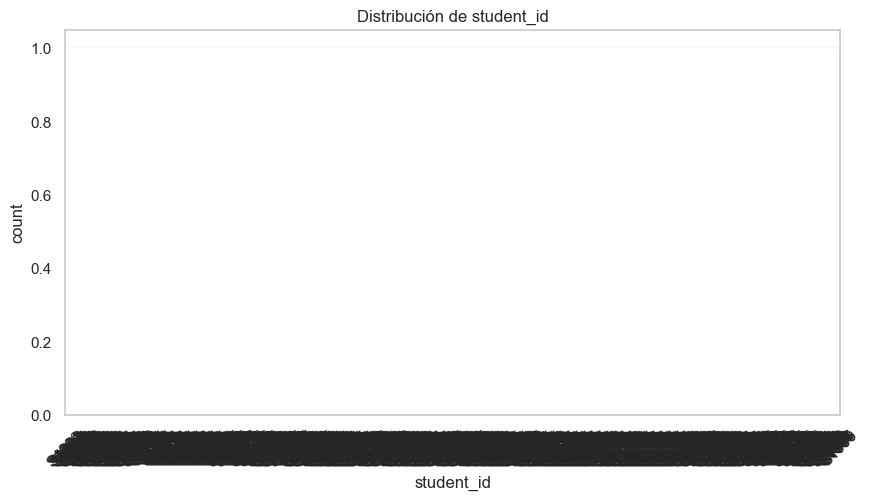

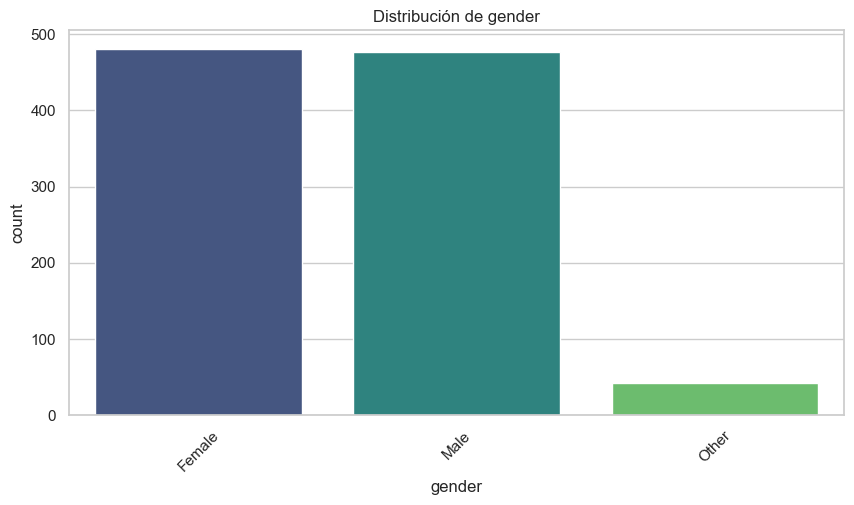

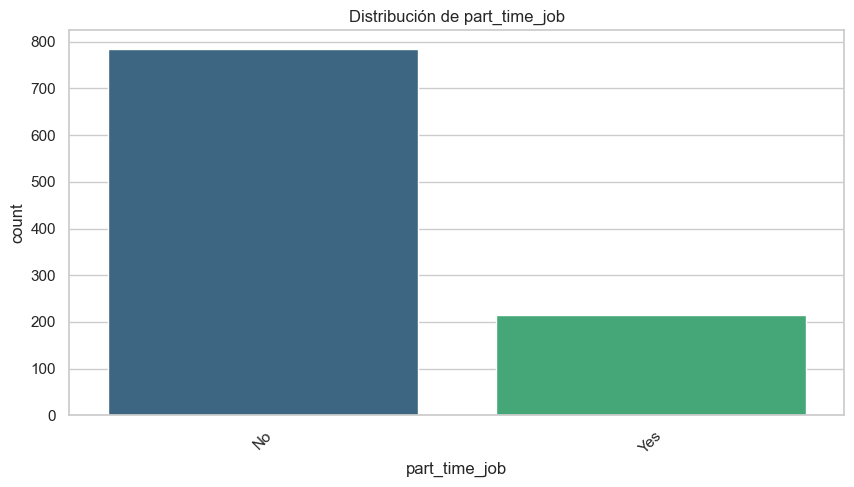

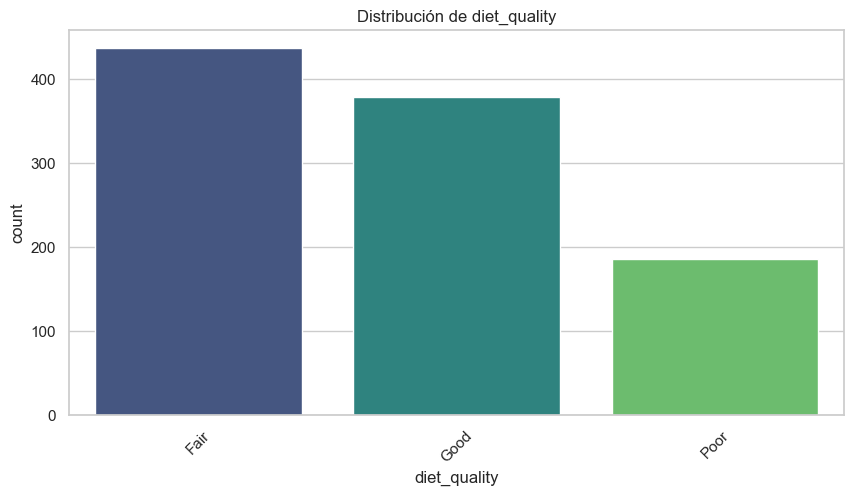

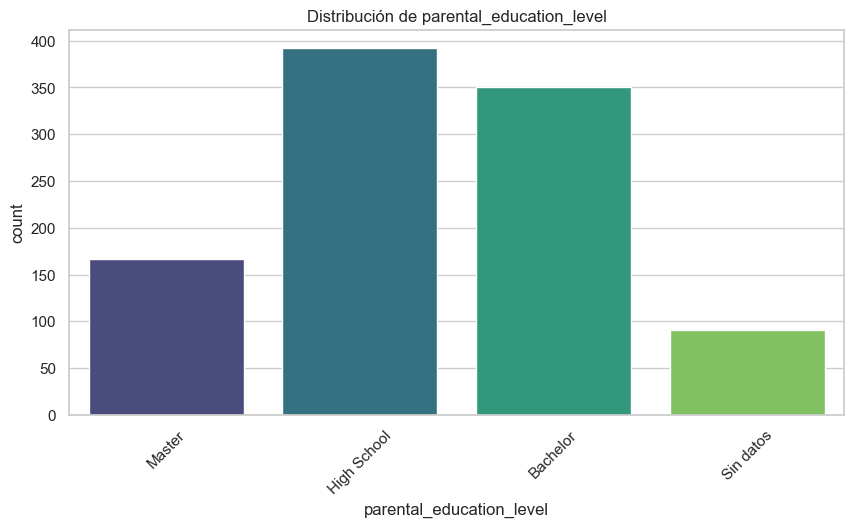

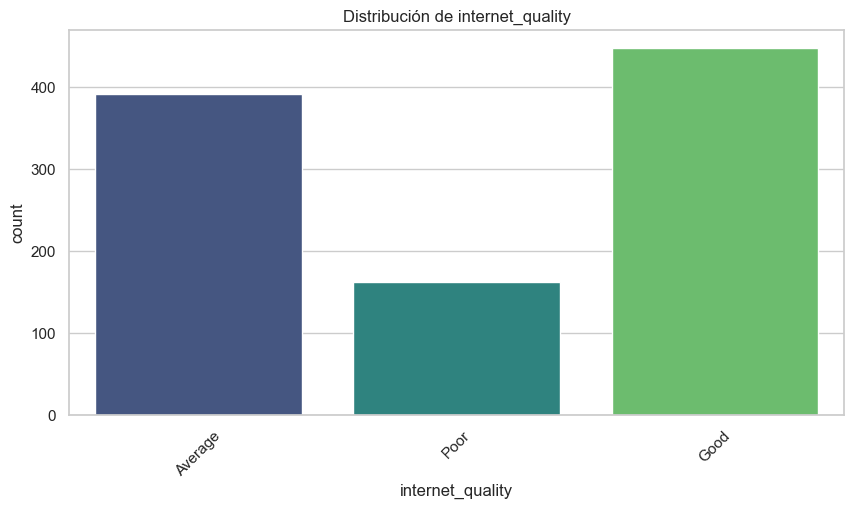

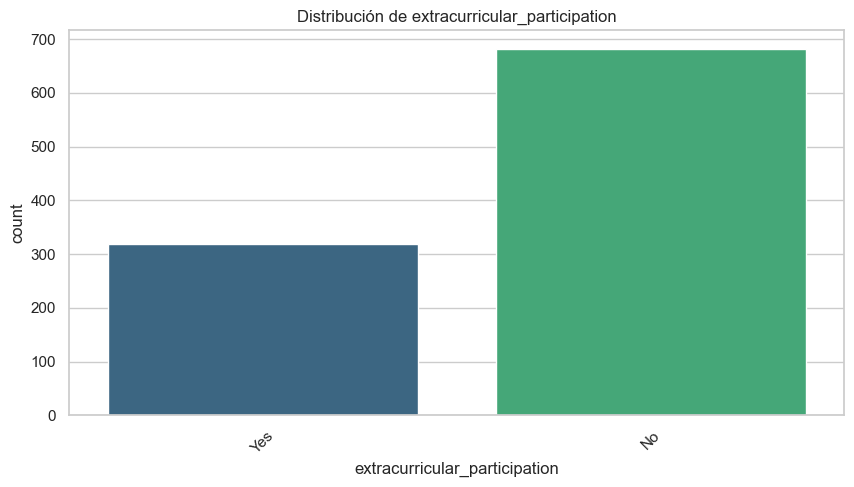

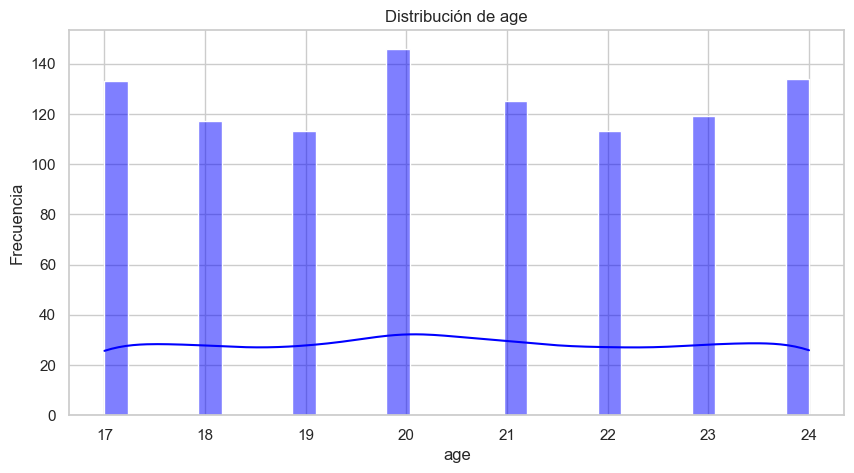

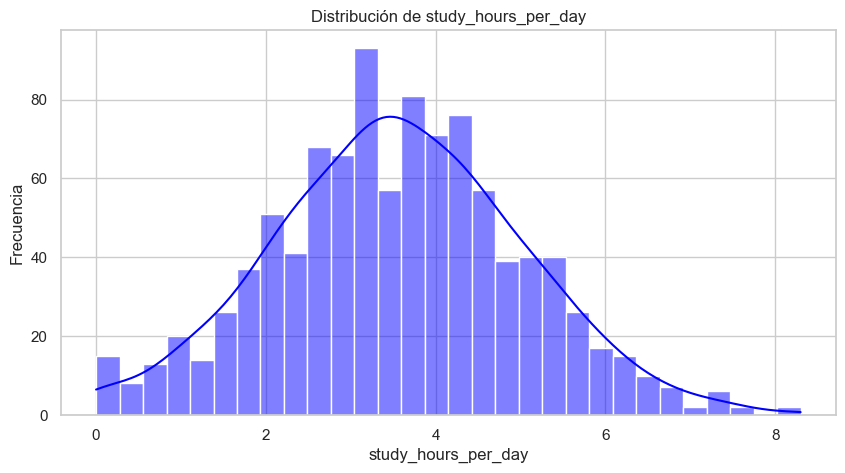

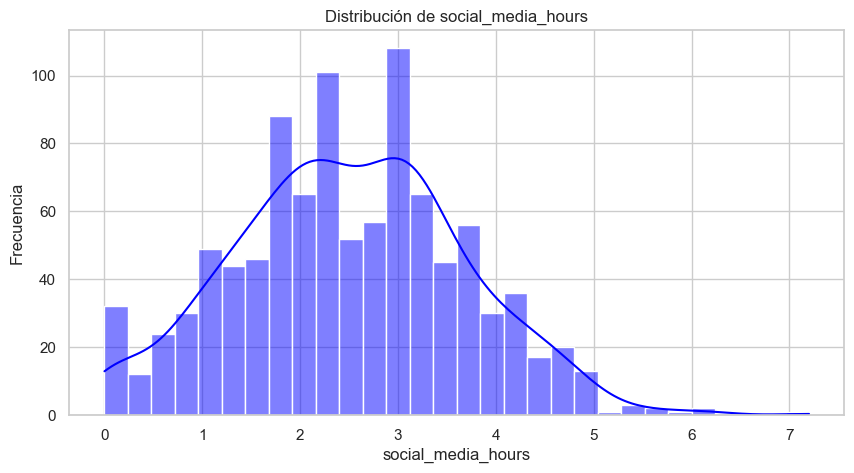

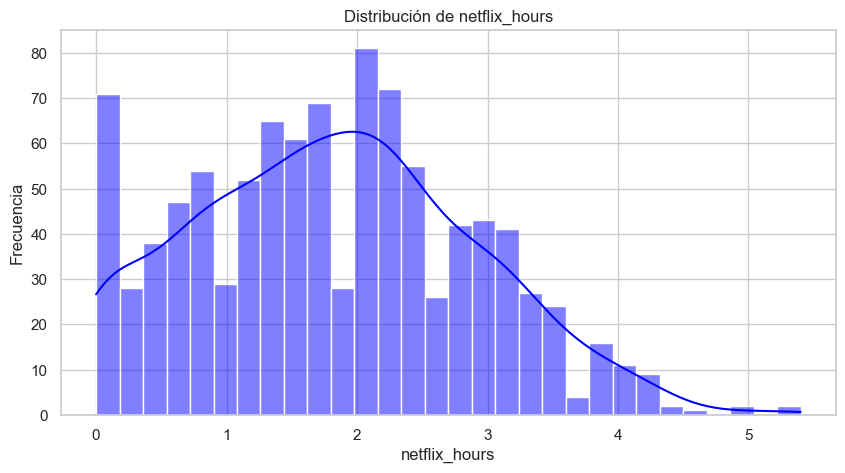

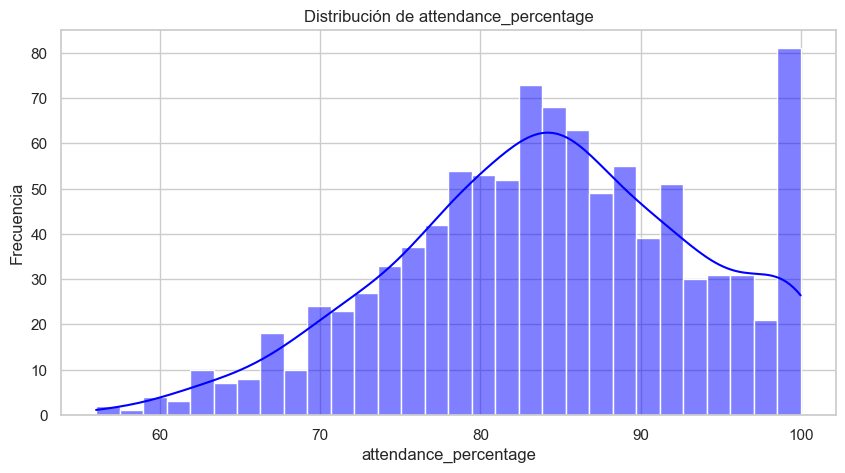

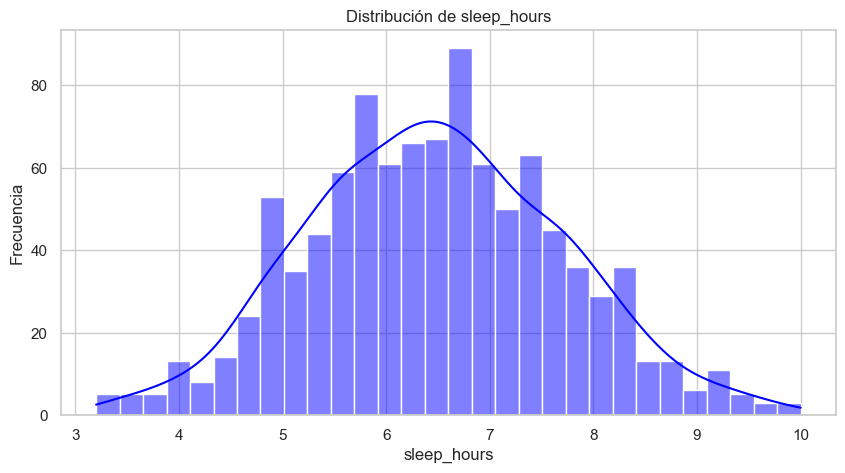

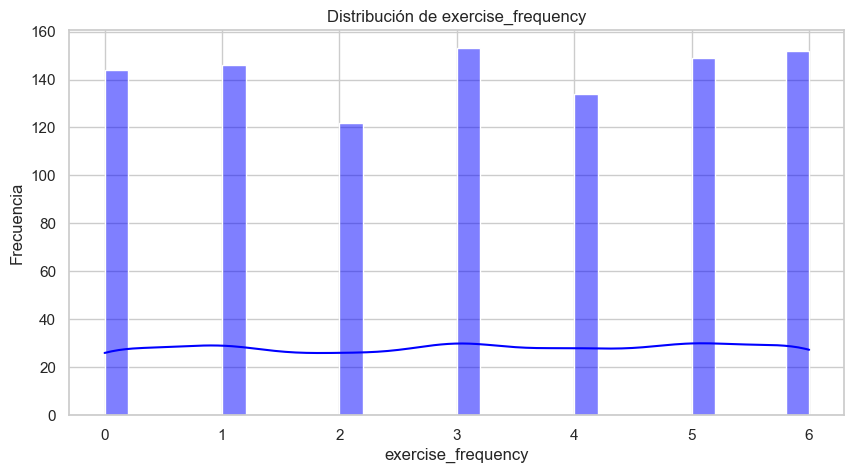

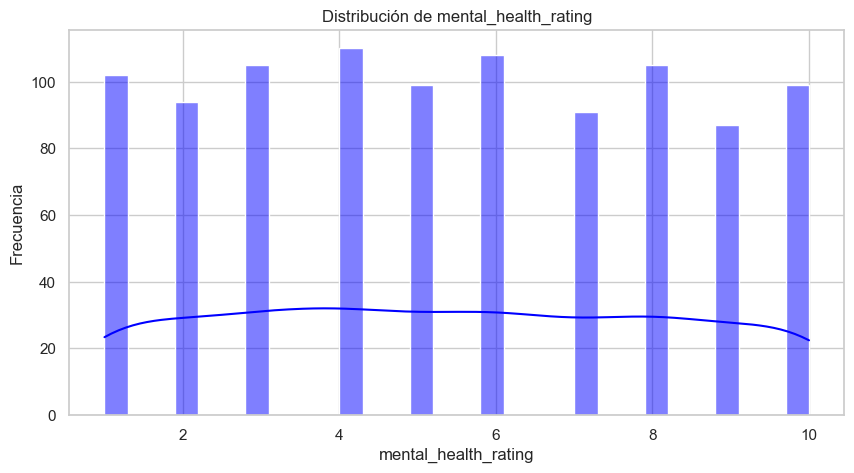

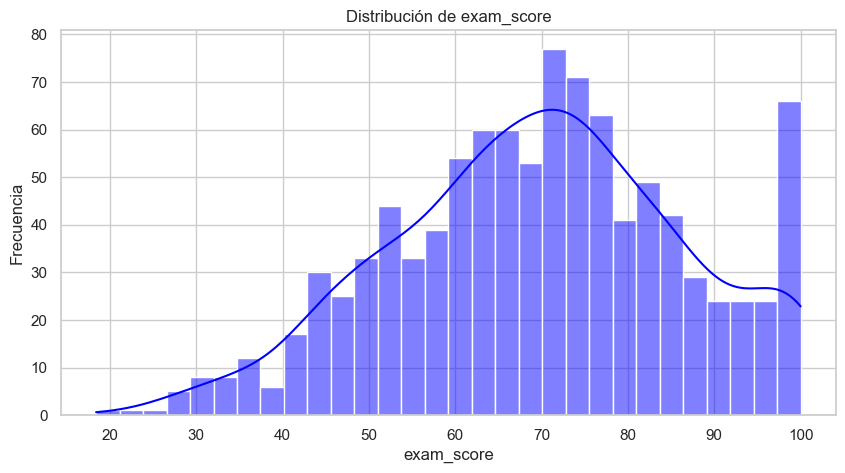

In [22]:
def plot_categorical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_numerical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    plot_categorical_distribution(df, col)
for col in numerical_cols:
    plot_numerical_distribution(df, col)
    

### EDA

#### análisis bivariado (comparamos dos variables)

Correlación entre horas de estudio y calificación: 0.83


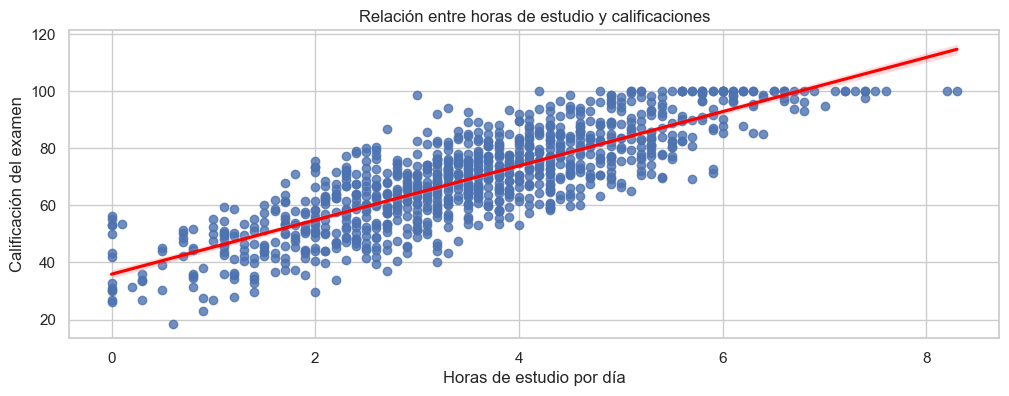

In [23]:
# Relación entre horas de estudio y calificaciones
correlacion = df['study_hours_per_day'].corr(df['exam_score'])
print(f'Correlación entre horas de estudio y calificación: {correlacion:.2f}')


sns.regplot(x='study_hours_per_day', y='exam_score', data=df, line_kws={'color': 'red'})
plt.title('Relación entre horas de estudio y calificaciones')
plt.xlabel('Horas de estudio por día')
plt.ylabel('Calificación del examen')
plt.grid(True)
plt.show()

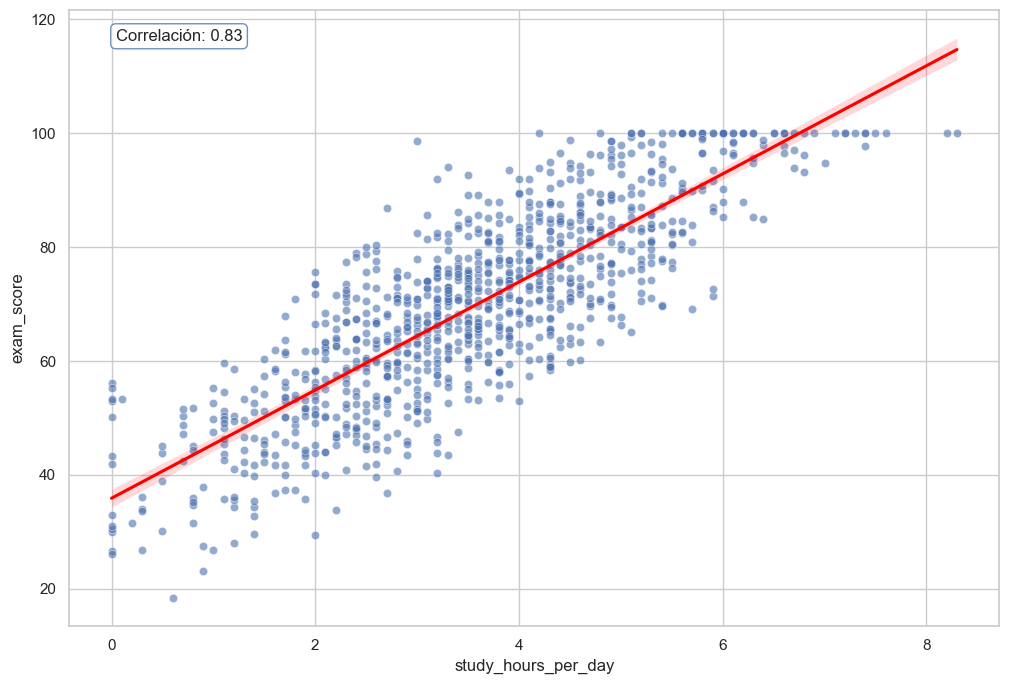

'\nLa función plt.annotate se utiliza para agregar una anotación en el gráfico. \nEl texto de la anotación es una cadena formateada (f\'Correlación: {corr:.2f}\'), \nque incluye el valor de la correlación (corr) redondeado a dos decimales. Este valor \nse calcula previamente con el método .corr() de pandas, que mide la relación lineal \nentre las dos columnas del DataFrame.\n\nEl parámetro xy=(0.05, 0.95) indica la posición de la anotación en coordenadas \nnormalizadas del eje (axes fraction), donde (0, 0) es la esquina inferior izquierda \ny (1, 1) es la esquina superior derecha del gráfico. Esto asegura que la anotación \nse coloque en la parte superior izquierda del gráfico, independientemente de los \nvalores de los datos.\n\nEl argumento bbox define un cuadro alrededor del texto de la anotación. Este cuadro \ntiene un estilo redondeado (boxstyle="round,pad=0.3"), un fondo blanco (fc="white"), \nun borde azul (ec="b"), un grosor de línea de 1 (lw=1) y una transparencia del 80% \n(a

In [24]:
# Relación entre horas de estudio y calificaciones
plt.figure(figsize=(12, 8)) # configuramos el tamaño de la figura
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, alpha=0.6) # alpha es la transparencia del punto
plt.xlabel('Horas de Estudio por Día') 
plt.ylabel('Calificación en Examen')


# línea de regresión
sns.regplot(x='study_hours_per_day', y='exam_score', data=df, scatter=False, color='red') # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['study_hours_per_day'].corr(df['exam_score']) # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8)) # anotamos la correlación en la figura mediante un cuadro 
plt.show() 
'''
La función plt.annotate se utiliza para agregar una anotación en el gráfico. 
El texto de la anotación es una cadena formateada (f'Correlación: {corr:.2f}'), 
que incluye el valor de la correlación (corr) redondeado a dos decimales. Este valor 
se calcula previamente con el método .corr() de pandas, que mide la relación lineal 
entre las dos columnas del DataFrame.

El parámetro xy=(0.05, 0.95) indica la posición de la anotación en coordenadas 
normalizadas del eje (axes fraction), donde (0, 0) es la esquina inferior izquierda 
y (1, 1) es la esquina superior derecha del gráfico. Esto asegura que la anotación 
se coloque en la parte superior izquierda del gráfico, independientemente de los 
valores de los datos.

El argumento bbox define un cuadro alrededor del texto de la anotación. Este cuadro 
tiene un estilo redondeado (boxstyle="round,pad=0.3"), un fondo blanco (fc="white"), 
un borde azul (ec="b"), un grosor de línea de 1 (lw=1) y una transparencia del 80% 
(alpha=0.8). Esto mejora la legibilidad del texto en el gráfico.
'''

In [25]:
!pip install nbformat>=4.2.0

In [35]:


# Create an interactive scatter plot
# Create the scatter plot
fig = px.scatter( df,

                 x='study_hours_per_day',
                 y='exam_score',
                 color='parental_education_level',
                 hover_data=['student_id', 'age', 'gender', 'mental_health_rating'],
                 title='Study Hours vs Exam Scores by Parental Education Level',
                 labels={
                     'study_hours_per_day': 'Study Hours per Day',
                     'exam_score': 'Exam Score (%)',
                     'parental_education_level': 'Parental Education'
                 },
                 height=600,
                 width=900,
                 trendline="ols"
                )
 
# Calculate correlation
correlation = df['study_hours_per_day'].corr(df['exam_score'])
correlation_text = f'Correlation: {correlation:.2f}'
 
# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="Education Level"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    annotations=[
        dict(
            x=0.02,
            y=0.98,
            xref="paper",
            yref="paper",
            text=correlation_text,
            showarrow=False,
            font=dict(size=14)
        )
    ],
    font=dict(size=12),
    yaxis_range=[0, 100],
    margin=dict(l=50, r=50, t=80, b=50)
)
 
# Update hover tooltips with percentage format
fig.update_traces(
    marker=dict(size=8),
    hovertemplate="<br>".join([
        "Study Hours: %{x:.1f}",
        "Exam Score: %{y:.1f}%",
        "Education Level: %{color}",
        "<extra></extra>"
    ])
)
 
fig.show() 

#### Relación entre horas en redes sociales y calificaciones

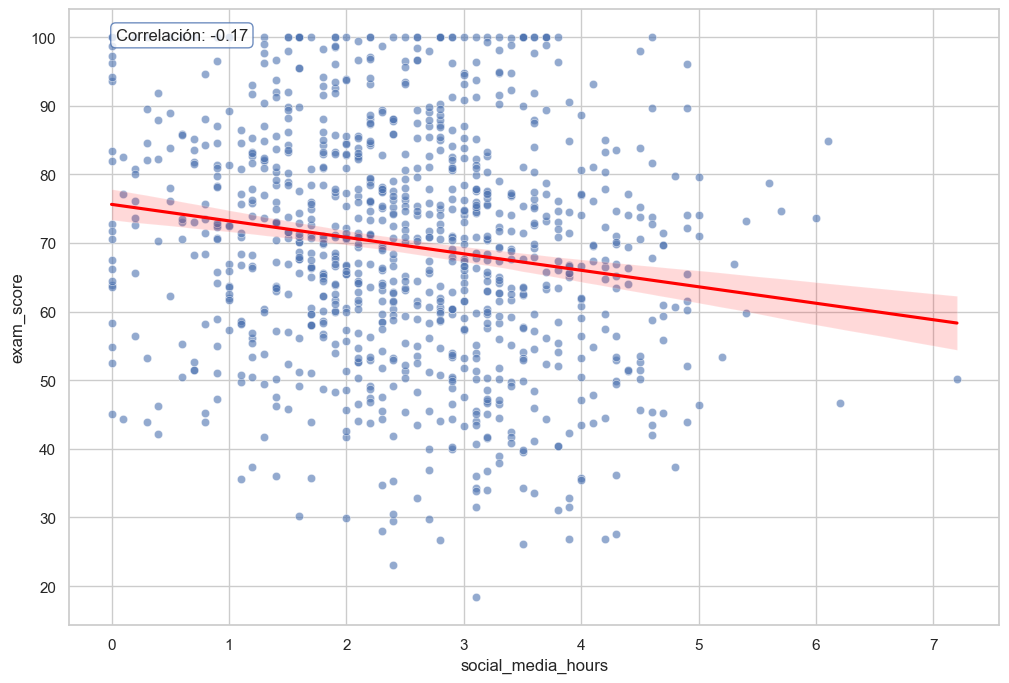

In [27]:
# Relación entre horas en redes y calificaciones
plt.figure(figsize=(12, 8)) # configuramos el tamaño de la figura
sns.scatterplot(x='social_media_hours', y='exam_score', data=df, alpha=0.6) # alpha es la transparencia del punto
plt.xlabel('Horas de Redes sociales por Día') 
plt.ylabel('Calificación en Examen')


# línea de regresión
sns.regplot(x='social_media_hours', y='exam_score', data=df, scatter=False, color='red') # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['social_media_hours'].corr(df['exam_score']) # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8)) # anotamos la correlación en la figura mediante un cuadro 
plt.show() 


# La conclusion es que, aunque los datos muestran que a más horas de redes sociales la calificación es menor, no hay
# un dato significativamente negativo que indique que este poniendo en riesgo los estudios.

### Relación entre horas de Netflix y calificaciones

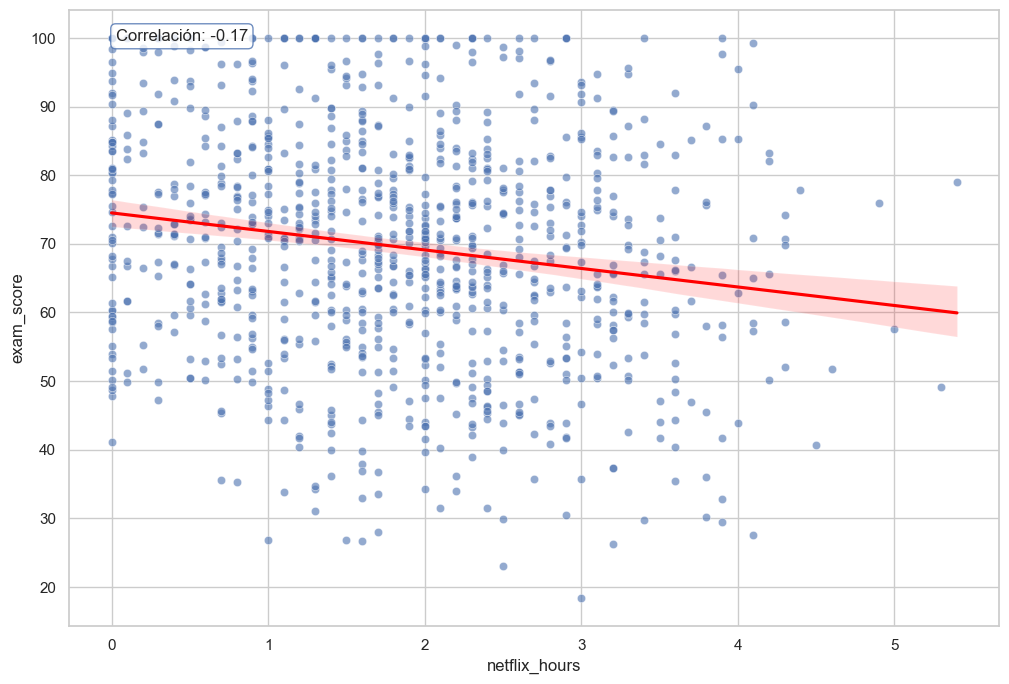

In [28]:
# Relación entre horas de Netflix y calificaciones
plt.figure(figsize=(12, 8)) # configuramos el tamaño de la figura
sns.scatterplot(x='netflix_hours', y='exam_score', data=df, alpha=0.6) # alpha es la transparencia del punto
plt.xlabel('Horas de Netflix por Día') 
plt.ylabel('Calificación en Examen')


# línea de regresión
sns.regplot(x='netflix_hours', y='exam_score', data=df, scatter=False, color='red') # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['netflix_hours'].corr(df['exam_score']) # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8)) # anotamos la correlación en la figura mediante un cuadro 
plt.show() 

### Relación entre horas de sueño y calificaciones

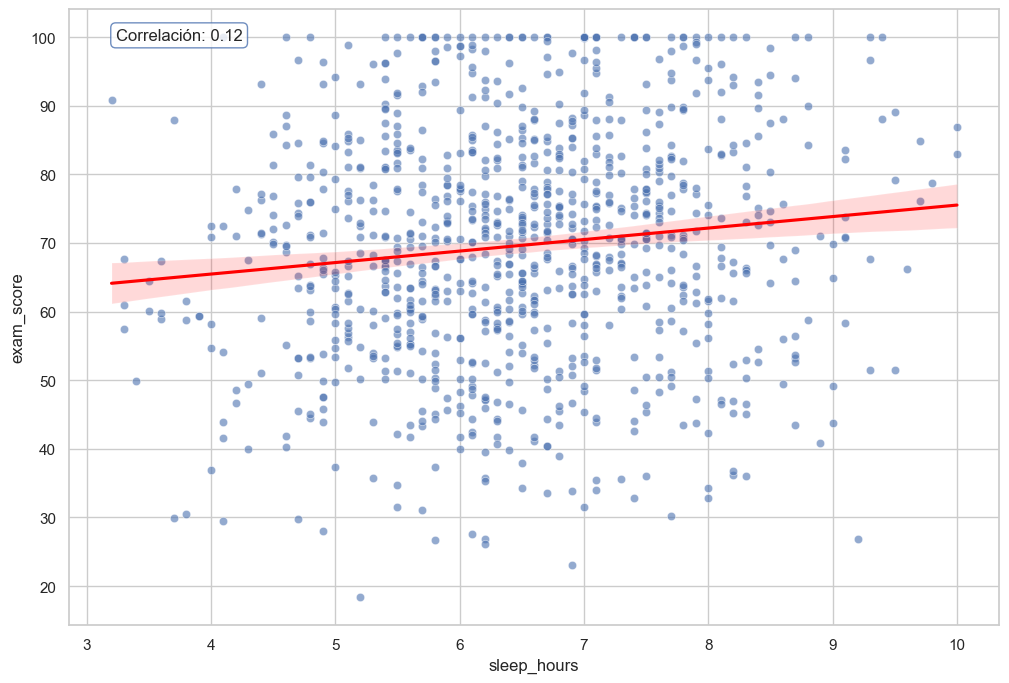

In [29]:
# Relación entre horas de sueño y calificaciones
plt.figure(figsize=(12, 8)) # configuramos el tamaño de la figura
sns.scatterplot(x='sleep_hours', y='exam_score', data=df, alpha=0.6) # alpha es la transparencia del punto
plt.xlabel('Horas de sueño por Día') 
plt.ylabel('Calificación en Examen')


# línea de regresión
sns.regplot(x='sleep_hours', y='exam_score', data=df, scatter=False, color='red') # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['sleep_hours'].corr(df['exam_score']) # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8)) # anotamos la correlación en la figura mediante un cuadro 
plt.show() 

#Conclusión: Dormir más puede aumentar el rendimimento de un 15%, pero no hay una correlación importante que indique que aumente de una forma importante.

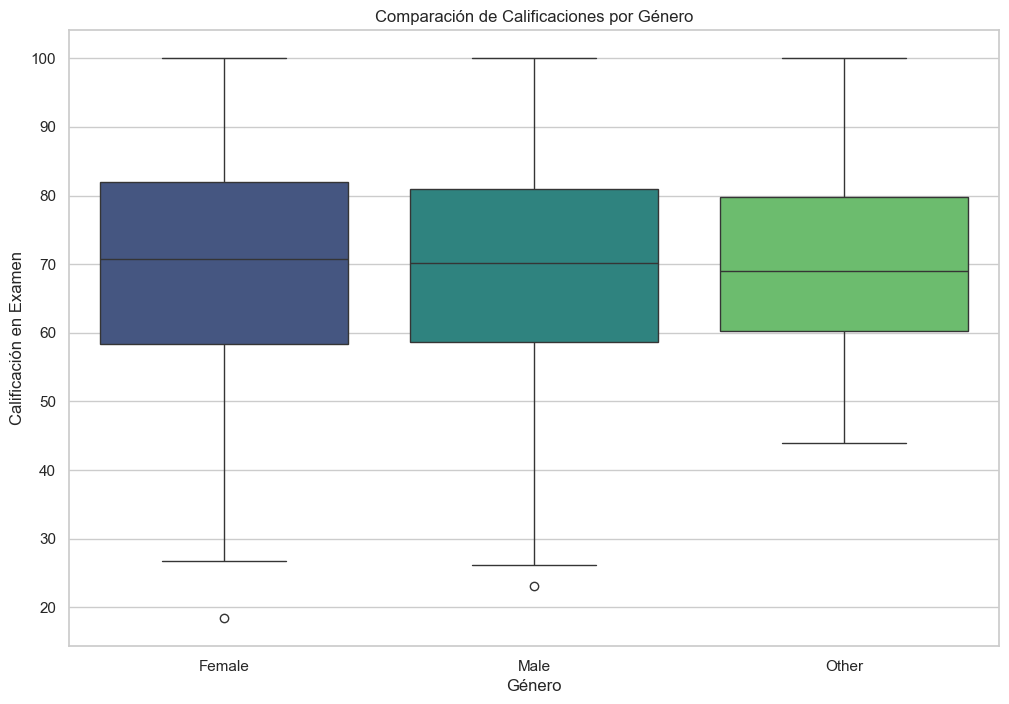

In [30]:
# Compara calificaciones por género
plt.figure(figsize=(12, 8))  # configuramos el tamaño de la figura
sns.boxplot(x='gender', y='exam_score', data=df, palette='viridis')  # utilizamos un boxplot para comparar calificaciones por género
plt.xlabel('Género') 
plt.ylabel('Calificación en Examen')
plt.title('Comparación de Calificaciones por Género')
plt.show()

#conclusion: No hay diferencia en el sexo del alumno


#### Compara calificaciones por trabajo de medio tiempo

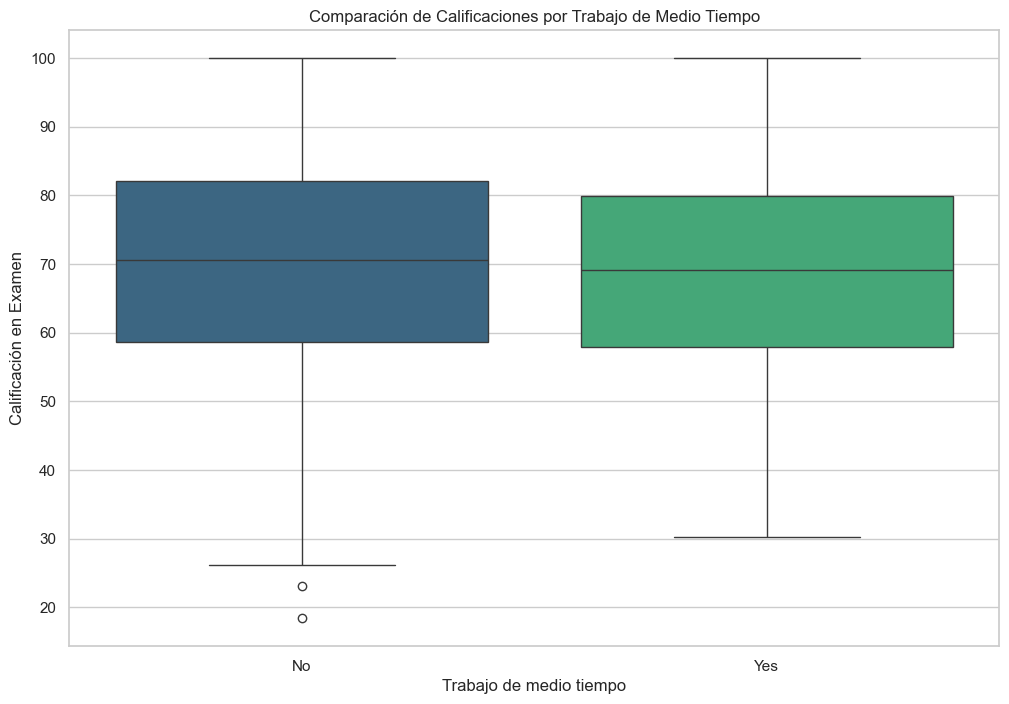

In [31]:
# Compara calificaciones por trabajo de medio tiempo
plt.figure(figsize=(12, 8))  # configuramos el tamaño de la figura
sns.boxplot(x='part_time_job', y='exam_score', data=df, palette='viridis')  # utilizamos un boxplot para comparar calificaciones
plt.xlabel('Trabajo de medio tiempo') 
plt.ylabel('Calificación en Examen')
plt.title('Comparación de Calificaciones por Trabajo de Medio Tiempo')
plt.show()

# Conclusión: Este gráfico permite observar que no existe una diferencia significativa en las calificaciones
# entre estudiantes con y sin trabajo de medio tiempo.


#### Compara calificaciones por calidad de dieta

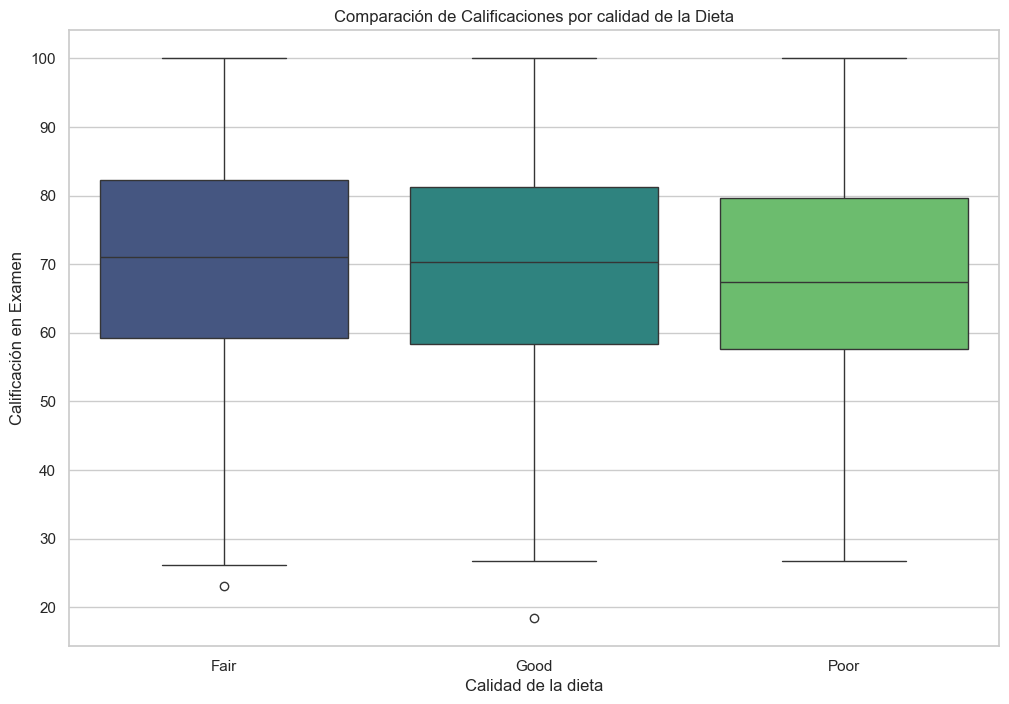

In [32]:
# Compara calificaciones por calidad de dieta
plt.figure(figsize=(12, 8))  # configuramos el tamaño de la figura
sns.boxplot(x='diet_quality', y='exam_score', data=df, palette='viridis')  # utilizamos un boxplot para comparar calificaciones
plt.xlabel('Calidad de la dieta') 
plt.ylabel('Calificación en Examen')
plt.title('Comparación de Calificaciones por calidad de la Dieta')
plt.show()

#Conclusión: Este gráfico permite observar que no existe una diferencia significativa en las calificaciones
# entre estudiantes con una dieta de mejor calidad, podemos observar que los que tienen una calidad mas pobre tienen un ligero
# descenso, pero no muy significativo.

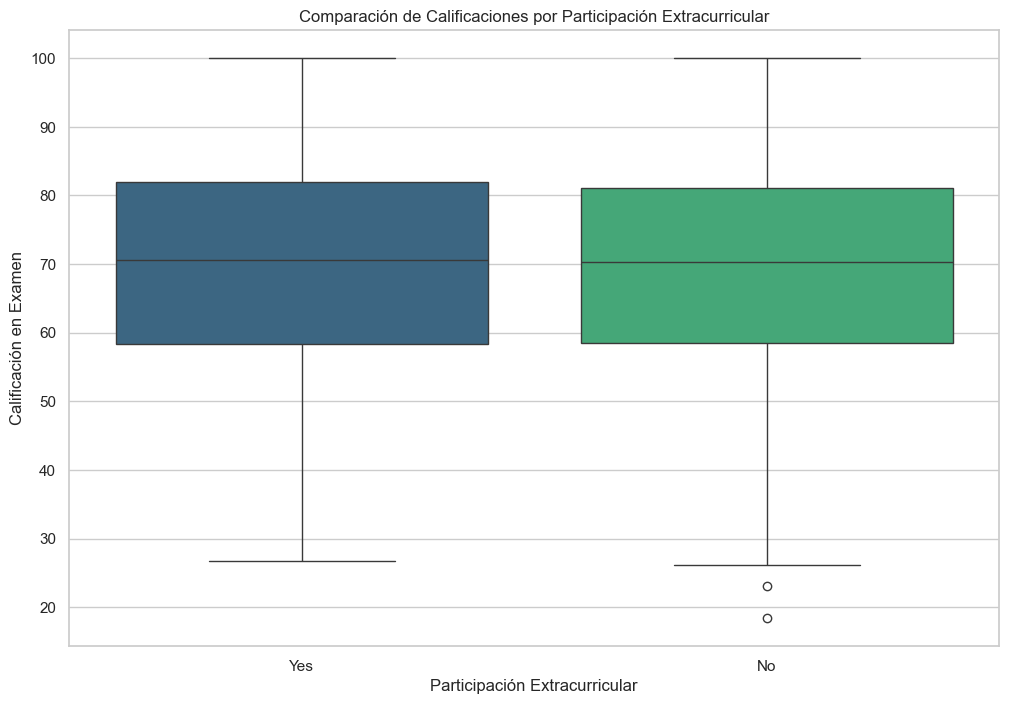

In [33]:
# Compara calificaciones por participación extracurricular
plt.figure(figsize=(12, 8))  # configuramos el tamaño de la figura
sns.boxplot(x='extracurricular_participation', y='exam_score', data=df, palette='viridis')  # utilizamos un boxplot para comparar calificaciones
plt.xlabel('Participación Extracurricular') 
plt.ylabel('Calificación en Examen')
plt.title('Comparación de Calificaciones por Participación Extracurricular')
plt.show()

# Conclusión: Este gráfico permite observar que no existe una diferencia significativa en las calificaciones
# entre estudiantes que participan en actividades extracurriculares y los que no.

<Axes: >

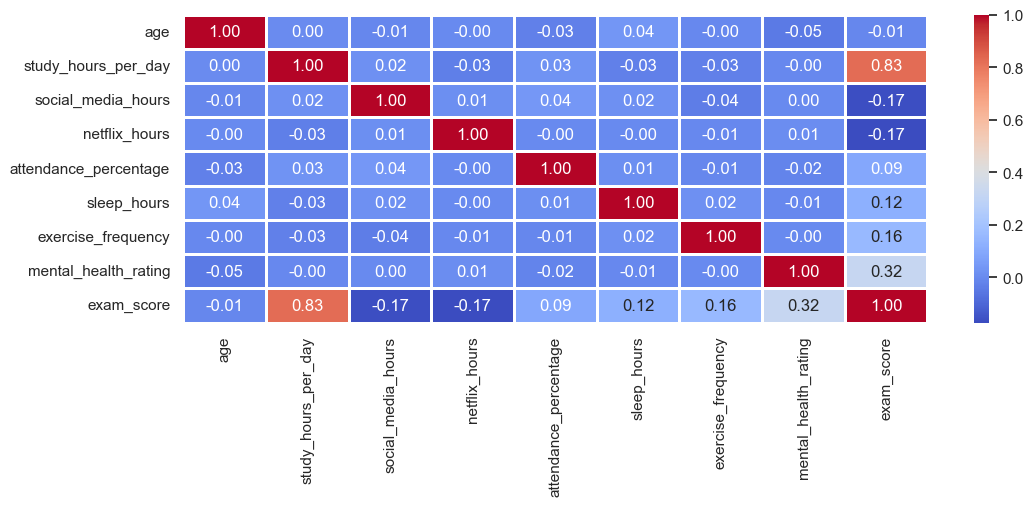

In [34]:
var_num = df.select_dtypes(include=[np.number]).columns.tolist()
sns.heatmap(df[var_num].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)

#### Analisis multivariable o multivariado

Análisis por grupos: calidad de dieta y horas de estucio vs calificaciones

In [47]:
# Crear un gráfico de dispersión interactivo para comparar calidad de vida y horas de estudio vs calificaciones
fig = px.scatter(
    df,
    x='study_hours_per_day',
    y='exam_score',
    color='diet_quality',
    size='attendance_percentage',
    hover_data=['student_id', 'age', 'gender', 'mental_health_rating'],
    title='Comparación de Calidad de Vida y Horas de Estudio vs Calificaciones',
    labels={
        'study_hours_per_day': 'Horas de Estudio por Día',
        'exam_score': 'Calificaciones (%)',
        'diet_quality': 'Calidad de la Dieta',
        'attendance_percentage': 'Asistencia (%)'
    },
    height=600,
    width=900,
    trendline="ols"
)

# Personalizar el diseño para mejor visibilidad
fig.update_layout(
    plot_bgcolor='rgba(240,240,240,1)',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="Calidad de la Dieta"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    font=dict(size=12),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Personalizar las trazas del gráfico
fig.update_traces(
    marker=dict(opacity=0.7, line=dict(width=0.5, color='DarkSlateGrey')),
    hovertemplate="<br>".join([
        "Horas de Estudio: %{x:.1f}",
        "Calificaciones: %{y:.1f}%",
        "Calidad de la Dieta: %{marker.color}",
        "Asistencia: %{marker.size:.1f}%",
        "<extra></extra>"
    ])
)

fig.show()

# Conclusión: Este gráfico permite observar cómo la calidad de vida (representada por la calidad de la dieta y la asistencia)
# y las horas de estudio influyen en las calificaciones.


In [38]:
# Create an interactive scatter plot
# Create the scatter plot
fig = px.scatter( df,

                 x='study_hours_per_day',
                 y='exam_score',
                 color='diet_quality',
                 hover_data=['student_id', 'age', 'gender', 'mental_health_rating'],
                 title='Estudio por calidad de dieta y horas de estudio vs calificaciones',
                 labels={
                     'study_hours_per_day': 'Horas de estudio por dia',
                     'exam_score': 'Calificaciones (%)',
                     'diet_quality': 'Calidad de la dieta'
                 },
                 height=600,
                 width=900,
                 trendline="ols"
                )
 
# Calculate correlation
correlation = df['study_hours_per_day'].corr(df['exam_score'])
correlation_text = f'Correlation: {correlation:.2f}'
 
# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="Calidad de la dieta"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    annotations=[
        dict(
            x=0.02,
            y=0.98,
            xref="paper",
            yref="paper",
            text=correlation_text,
            showarrow=False,
            font=dict(size=14)
        )
    ],
    font=dict(size=12),
    yaxis_range=[0, 100],
    margin=dict(l=50, r=50, t=80, b=50)
)
 
# Update hover tooltips with percentage format
fig.update_traces(
    marker=dict(size=8),
    hovertemplate="<br>".join([
        "Study Hours: %{x:.1f}",
        "Exam Score: %{y:.1f}%",
        "Education Level: %{color}",
        "<extra></extra>"
    ])
)
 
fig.show() 

#Conclusión: Mediante el grafico podemos observar que la calidad de la dieta no influye de una forma significativa en las calificaciones,
# siendo lo más influyente e importante las horas de estudio.

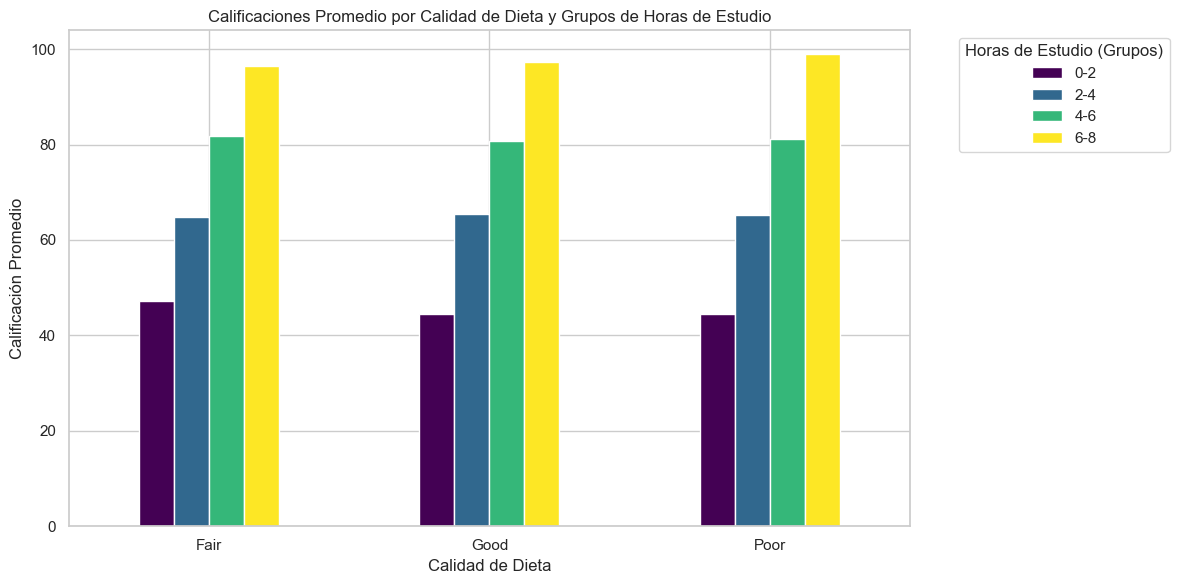

In [48]:
# Crear una nueva columna para agrupar las horas de estudio en intervalos
df['study_hours_group'] = pd.cut(df['study_hours_per_day'],
                                 bins=np.arange(0, df['study_hours_per_day'].max() + 1, 2),
                                 right=False,
                                 labels=[f'{i}-{i+2}' for i in range(0, int(df['study_hours_per_day'].max()), 2)])
 
# Calcular la media de calificaciones por calidad de dieta y grupo de horas de estudio
grouped_data = df.groupby(['diet_quality', 'study_hours_group'])['exam_score'].mean().unstack()
 
# Crear gráfico de barras agrupadas
grouped_data.plot(kind='bar', figsize=(12, 6), colormap='viridis')
 
# Configurar etiquetas y título
plt.title('Calificaciones Promedio por Calidad de Dieta y Grupos de Horas de Estudio')
plt.xlabel('Calidad de Dieta')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=0)
plt.legend(title='Horas de Estudio (Grupos)', bbox_to_anchor=(1.05, 1), loc='upper left')
 
plt.tight_layout()
plt.show()

#### Análisis por grupos: participación extracurricular y horas de estudio vs calificaciones

In [42]:
# Create an interactive scatter plot
# Create the scatter plot
fig = px.scatter( df,

                 x='study_hours_per_day',
                 y='exam_score',
                 color='extracurricular_participation',
                 hover_data=['student_id', 'age', 'gender', 'mental_health_rating'],
                 title='Estudio por participación extracurricular y horas de estudio vs calificaciones',
                 labels={
                     'study_hours_per_day': 'Horas de estudio por dia',
                     'exam_score': 'Calificaciones (%)',
                     'extracurricular_participation': 'Participacion extracurricular'
                 },
                 height=600,
                 width=900,
                 trendline="ols"
                )
 
# Calculate correlation
correlation = df['study_hours_per_day'].corr(df['exam_score'])
correlation_text = f'Correlation: {correlation:.2f}'
 
# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="Participación extracurricular"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    annotations=[
        dict(
            x=0.02,
            y=0.98,
            xref="paper",
            yref="paper",
            text=correlation_text,
            showarrow=False,
            font=dict(size=14)
        )
    ],
    font=dict(size=12),
    yaxis_range=[0, 100],
    margin=dict(l=50, r=50, t=80, b=50)
)
 
# Update hover tooltips with percentage format
fig.update_traces(
    marker=dict(size=8),
    hovertemplate="<br>".join([
        "Study Hours: %{x:.1f}",
        "Exam Score: %{y:.1f}%",
        "Education Level: %{color}",
        "<extra></extra>"
    ])
)
 
fig.show() 

#Conclusión: Mediante el grafico podemos observar que la participación extracurricular no influye de una forma significativa en las calificaciones,
# siendo lo más influyente e importante las horas de estudio.

#### Análisis por grupos: horas de sueño, salud mental y calificaciones

In [46]:
# Crear un gráfico de barras para mostrar la distribución de calificaciones por calidad de dieta y género
fig = px.scatter(
    df,
    x='sleep_hours',
    y='exam_score',
    color='mental_health_rating',
    size='attendance_percentage',
    hover_data=['student_id', 'age', 'gender', 'diet_quality'],
    title='Relación entre horas de sueño, salud mental y calificaciones',
    labels={
        'sleep_hours': 'Horas de sueño',
        'exam_score': 'Calificaciones (%)',
        'mental_health_rating': 'Salud mental',
        'attendance_percentage': 'Asistencia (%)'
    },
    height=600,
    width=900,
    trendline="ols"
)

# Personalizar el diseño para mejor visibilidad
fig.update_layout(
    plot_bgcolor='rgba(240,240,240,1)',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="Salud mental"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    font=dict(size=12),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Personalizar las trazas del gráfico
fig.update_traces(
    marker=dict(opacity=0.7, line=dict(width=0.5, color='DarkSlateGrey')),
    hovertemplate="<br>".join([
        "Horas de sueño: %{x:.1f}",
        "Calificaciones: %{y:.1f}%",
        "Salud mental: %{marker.color}",
        "Asistencia: %{marker.size:.1f}%",
        "<extra></extra>"
    ])
)

fig.show()


In [45]:
# Crear un gráfico de dispersión interactivo mejorado
fig = px.scatter(
    df,
    x='sleep_hours',
    y='exam_score',
    color='mental_health_rating',
    size='attendance_percentage',
    hover_data=['student_id', 'age', 'gender', 'diet_quality'],
    title='Relación entre horas de sueño, salud mental y calificaciones',
    labels={
        'sleep_hours': 'Horas de sueño',
        'exam_score': 'Calificaciones (%)',
        'mental_health_rating': 'Salud mental',
        'attendance_percentage': 'Asistencia (%)'
    },
    height=600,
    width=900,
    trendline="ols"
)

# Personalizar el diseño para mejor visibilidad
fig.update_layout(
    plot_bgcolor='rgba(240,240,240,1)',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="Salud mental"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    font=dict(size=12),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Personalizar las trazas del gráfico
fig.update_traces(
    marker=dict(opacity=0.7, line=dict(width=0.5, color='DarkSlateGrey')),
    hovertemplate="<br>".join([
        "Horas de sueño: %{x:.1f}",
        "Calificaciones: %{y:.1f}%",
        "Salud mental: %{marker.color}",
        "Asistencia: %{marker.size:.1f}%",
        "<extra></extra>"
    ])
)

fig.show()


In [ ]:
# Create an interactive scatter plot
# Create the scatter plot
fig = px.scatter( df,

                 x='sleep_hours',
                 y='exam_score',
                 color='mental_health_rating',
                 hover_data=['student_id', 'age', 'gender', 'mental_health_rating'],
                 title='Estudio por horas de sueño y salud mental vs calificaciones',
                 labels={
                     'ssleep_hours': 'Horas de sueño',
                     'exam_score': 'Calificaciones (%)',
                     'mental_health_rating': 'Salud mental'
                 },
                 height=600,
                 width=900,
                 trendline="ols"
                )
 
# Calculate correlation
correlation = df['sleep_hours'].corr(df['exam_score'])
correlation_text = f'Correlation: {correlation:.2f}'
 
# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="mental_health_rating"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    annotations=[
        dict(
            x=0.02,
            y=0.98,
            xref="paper",
            yref="paper",
            text=correlation_text,
            showarrow=False,
            font=dict(size=14)
        )
    ],
    font=dict(size=12),
    yaxis_range=[0, 100],
    margin=dict(l=50, r=50, t=80, b=50)
)
 
# Update hover tooltips with percentage format
fig.update_traces(
    marker=dict(size=8),
    hovertemplate="<br>".join([
        "Study Hours: %{x:.1f}",
        "Exam Score: %{y:.1f}%",
        "Education Level: %{color}",
        "<extra></extra>"
    ])
)
 
fig.show() 

#Conclusión: Mediante el grafico podemos observar que las horas y de sueño y la salud mental no influye de una forma significativa 
# en las calificaciones,siendo lo más influyente e importante las horas de estudio.

	